In [ ]:
# default_exp data
%load_ext lab_black
# nb_black if running in jupyter
%load_ext autoreload
# automatically reload python modules if there are changes in the
%autoreload 2

In [ ]:
# hide
from nbdev.showdoc import *

# Data

> You should begin your work by cleaning up your data and possibly defining tools for doing it repeateadly.



***input***: raw data

***output***: clean and tidy dataset for ML model / simulation / analytics + toy dataset for testing

***description:***

This is the first notebook of your machine learning project. In this notebook, you will load the data, inspect, clean and make it tidy. 
You will define the data points and their features and labels. The output of this notebook is a clean, tidy dataset ready for analysis and machine learning. 
For any functions you define for handling the data, remember to mark their cells with `# export` -comment, so that they will be included in the data-module build based on this notebook.
You can also include unit tests for your own functions.

## Import relevant modules

In [ ]:
# export
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

In [ ]:
# tag this with 'parameters'
output_clean_filepath = "data/preprocessed_data/dataset_clean_switzerland_cleveland.csv"
output_toy_filepath = "data/preprocessed_data/dataset_toy_switzerland_cleveland.csv"
seed = 0

In [ ]:
np.random.seed(seed)

## Load the data

For this example we will be using a subset of the heart disease dataset available at http://archive.ics.uci.edu/ml/datasets/Heart+Disease.

We combine two subsets of the whole dataset, cleveland & switzeland, to get enough datapoints and to include missing data points in the switzeland dataset.
In addition, before saving the results for later use in the end of this notebook, we suffle the dataset to reduce need for costly randomization operations in the future.

Here we are downloading an online dataset. Typically you would load a dataset from some database, or disk. 
Please note, that you should not add your datasets to git, as it is not intended for data version control and tracking large datafiles exceed the limits of it. The 'data'-folder of this template is ignored by git.

In [ ]:
df = pd.concat(
    (
        pd.read_csv(
            "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data",
            sep=",",
            names=range(14)
            # na_values="?", # we could convert non-numericals to na already here
        ),
        pd.read_csv(
            "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
            names=range(14),
        ),
    )
)

## Describe the data

Define data points, features and labels

As you may notice, the dataset did not include row or column labels. 
This is a bit untypical, normally the names of the variables are stored with the data.
We have to load them separately and add them to the dataframe.

In [ ]:
import urllib

name_rows = []
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names"
file = urllib.request.urlopen(url)
line_of_interest = False  # skip unrelevant lines
# this file contains all information of the dataset, in a non-structured form
for line in file:
    decoded_line = line.decode("utf-8").strip("\n")
    if "Complete attribute documentation" in decoded_line:
        line_of_interest = False
    if line_of_interest and decoded_line != "":
        name_rows.append(decoded_line.strip(" "))
    if "Only 14 used" in decoded_line:
        line_of_interest = True

_ = [print(val) for val in name_rows]

-- 1. #3  (age)
-- 2. #4  (sex)
-- 3. #9  (cp)
-- 4. #10 (trestbps)
-- 5. #12 (chol)
-- 6. #16 (fbs)
-- 7. #19 (restecg)
-- 8. #32 (thalach)
-- 9. #38 (exang)
-- 10. #40 (oldpeak)
-- 11. #41 (slope)
-- 12. #44 (ca)
-- 13. #51 (thal)
-- 14. #58 (num)       (the predicted attribute)


Ok, so there are 13 features and one label in the data. Let's construct these into dataframe column names.

The label shows if the patient is diagnosed with a heart disease (values 1-4) or not (value 0)

In [ ]:
col_names = [
    "".join(row)
    for row in [
        [
            val.replace(" ", "").split(".")[0].split("-")[-1],
            val.replace(" ", "").split(")")[0].split("(")[-1],
        ]
        for val in name_rows
    ]
]
col_names[:-1] = ["x" + val for val in col_names[:-1]]
col_names[-1] = "y1" + col_names[-1][-3:]

df.columns = col_names
df.head()

,x1age,x2sex,x3cp,x4trestbps,x5chol,x6fbs,x7restecg,x8thalach,x9exang,x10oldpeak,x11slope,x12ca,x13thal,y1num
0,32.0,1.0,1.0,95,0.0,?,0,127,0,.7,1,?,?,1
1,34.0,1.0,4.0,115,0.0,?,?,154,0,.2,1,?,?,1
2,35.0,1.0,4.0,?,0.0,?,0,130,1,?,?,?,7,3
3,36.0,1.0,4.0,110,0.0,?,0,125,1,1,2,?,6,1
4,38.0,0.0,4.0,105,0.0,?,0,166,0,2.8,1,?,?,2


## Clean the data and make it tidy

For analytics & ML purposes, we should make the data tidy. This means that

1. Every column is a variable (feature or label)

2. Every row is an observation (data point).

3. Every cell is a single value (int, float, cathegorical, str, but no nested structures like lists or dictionaries)

To make a dataset tidy, you must really think what is your data point, and modify, explode or remove all nested structures with respect to the datapoints. 

For example with image data you want to flatten the images from matrices or tensors to vectors.

In our example, our data point is a single patient. We see that the data is already in tidy format, but still contains some missing values.

Let us convert the variables to numerical values and replace missing values with N/A.


In [ ]:
df.dtypes

x1age         float64
x2sex         float64
x3cp          float64
x4trestbps     object
x5chol        float64
x6fbs          object
x7restecg      object
x8thalach      object
x9exang        object
x10oldpeak     object
x11slope       object
x12ca          object
x13thal        object
y1num           int64
dtype: object

In [ ]:
df.replace("?", np.nan, inplace=True)

In [ ]:
df = df.astype(
    {
        "x4trestbps": float,
        "x6fbs": float,
        "x7restecg": float,
        "x8thalach": float,
        "x9exang": float,
        "x10oldpeak": float,
        "x11slope": float,
        "x12ca": float,
        "x13thal": float,
    }
)
df.dtypes

x1age         float64
x2sex         float64
x3cp          float64
x4trestbps    float64
x5chol        float64
x6fbs         float64
x7restecg     float64
x8thalach     float64
x9exang       float64
x10oldpeak    float64
x11slope      float64
x12ca         float64
x13thal       float64
y1num           int64
dtype: object

Distributions of the variables:

In [ ]:
df.nunique()

x1age          45
x2sex           2
x3cp            4
x4trestbps     53
x5chol        153
x6fbs           2
x7restecg       3
x8thalach     111
x9exang         2
x10oldpeak     52
x11slope        3
x12ca           4
x13thal         3
y1num           5
dtype: int64

Let us see how much of the data is missing

In [ ]:
df.isna().sum()

x1age           0
x2sex           0
x3cp            0
x4trestbps      2
x5chol          0
x6fbs          75
x7restecg       1
x8thalach       1
x9exang         1
x10oldpeak      6
x11slope       17
x12ca         122
x13thal        54
y1num           0
dtype: int64

Ok,  there are many missing variables.

Now we have two alternatives: we can either get rid of the missing values, or use such robust methods that allow missing values in the data.

For removing the missing values we can either drop the columns with most missing data or try to impute the missing values from the data.

If there was very little data, we would most likely want to impute the missing data,
for example with use the Scikit-learn imputer: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.
If you do imputing of missing data, please consider the effects on data quality.

In this example, we are just going to first drop the columns with most na values, and then drop rows with na values.





In [ ]:
df = (
    df.drop(
        ["x2sex", "x3cp", "x5chol", "x7restecg", "x9exang"],
        axis=1,  # drop columns with categorical variables
    )
    .drop(
        ["x6fbs", "x11slope", "x12ca", "x13thal"],  # drop columns with most na values
        axis=1,
    )
    .dropna()  # drop rest of rows that still have na values
    .reset_index(drop=True)
)

In [ ]:
df.head()

,x1age,x4trestbps,x8thalach,x10oldpeak,y1num
0,32.0,95.0,127.0,0.7,1
1,34.0,115.0,154.0,0.2,1
2,36.0,110.0,125.0,1.0,1
3,38.0,105.0,166.0,2.8,2
4,38.0,110.0,156.0,0.0,1


In [ ]:
df.shape

(420, 5)

## Visualize the data

In [ ]:
# export plot
import matplotlib.pyplot as plt
import pandas as pd


def plot_histogram(df):
    """
    Plot histograms of a dataframe
    """
    n_cols = len(df.columns)
    col_names = df.columns.values
    fig, axs = plt.subplots(
        1, n_cols, figsize=(3 * n_cols, 3), constrained_layout=True, sharey="row"
    )
    for i in range(n_cols):
        ax = axs[i]
        col_name = col_names[i]
        x = df[col_name]
        x.plot(ax=ax, kind="hist")
        xmin, xmax = min(x), max(x)
    for i in range(n_cols):  # to have equal tick lines in each plot
        ax = axs[i]
        col_name = col_names[i]
        x = df[col_name]
        xmin, xmax = min(x), max(x)
        ax.hlines(
            y=axs[df.apply(lambda x: x.max()).argmin()].get_yticks()[
                1:-1
            ],  # select ticks from the fig with smallest max value
            xmin=xmin,
            xmax=xmax,
            colors="white",
            alpha=1,
            linewidth=2,
        )
        ax.set_xlabel(col_name)
        ax.set_title(f"{i})", loc="left")
        ax.spines["left"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
    return fig, ax

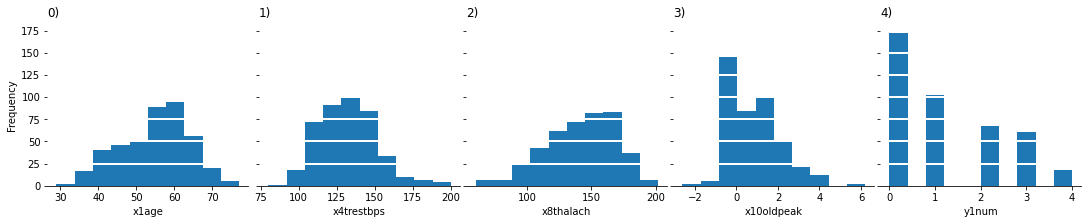

In [ ]:
_ = plot_histogram(df)

Let's replace different heart diagnoses with value 1

In [ ]:
df.y1num.replace([1, 2, 3, 4], 1, inplace=True)

Let's make a trellis plot of the features, and mark the label with colour and marker for visual analysis

In [ ]:
# export plot


def plot_trellis(df, legend_title="y", true_label="True", false_label="False"):
    """
    Make a trellis plot of a dataframe against a binary y value in last column
    """
    n_cols = df.shape[1] - 1
    col_names = df.columns.values

    fig, axs = plt.subplots(
        n_cols, n_cols, figsize=(n_cols * 3, n_cols * 3), constrained_layout=True
    )
    for i in range(n_cols):
        for j in range(n_cols):
            ax = axs[i, j]
            if i != j:
                # first plot negative cases
                df[df.iloc[:, -1] == 0].plot(
                    ax=ax,
                    x=col_names[j],
                    y=col_names[i],
                    kind="scatter",
                    color="r",
                    marker="o",
                    alpha=0.5,
                    label=false_label,
                )
                # then positive cases
                df[df.iloc[:, -1] != 0].plot(
                    ax=ax,
                    x=col_names[j],
                    y=col_names[i],
                    kind="scatter",
                    color="b",
                    marker="x",
                    alpha=0.5,
                    label=true_label,
                )
                # Hide the right and top spines
                ax.spines["right"].set_visible(False)
                ax.spines["top"].set_visible(False)
                ax.set_title(f"{i*n_cols+j})", loc="left")
                ax.legend(title=legend_title)
            else:
                ax.annotate(xy=(0, 0.5), text=col_names[i], fontsize=20)
                ax.axis("off")  # hide the box
    return fig, ax

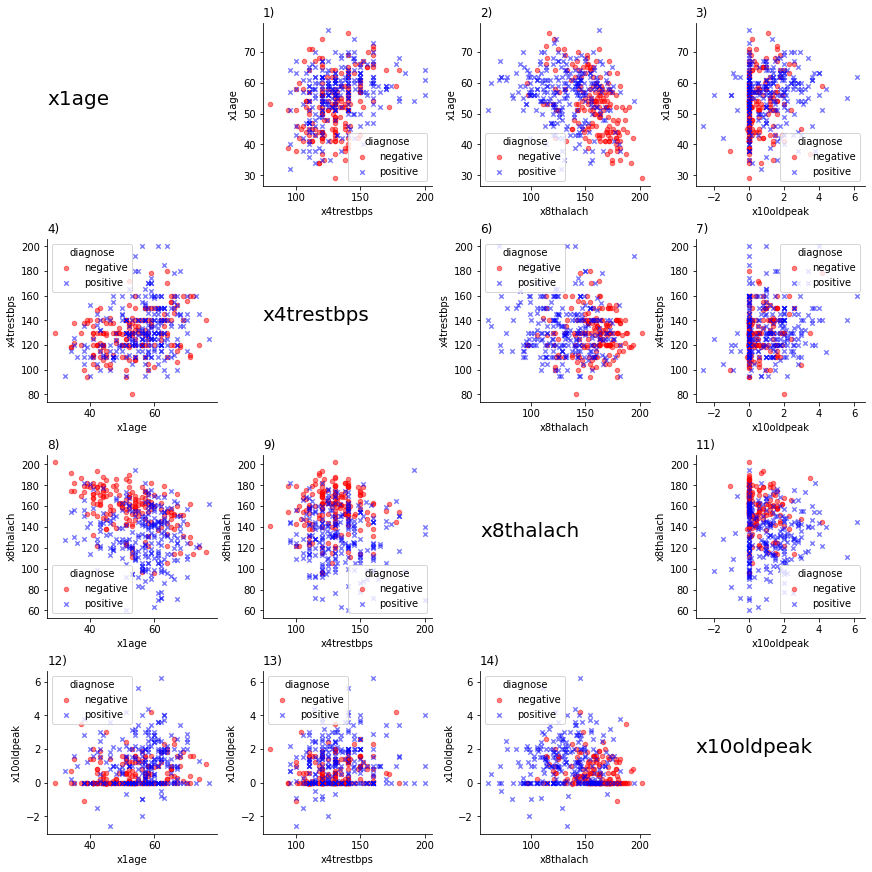

In [ ]:
_ = plot_trellis(
    df, legend_title="diagnose", true_label="positive", false_label="negative"
)

## Some intermediate conclusions based on data visualization

Can you find anything already based on pure visualization?

## Suffle dataset (optional, only if the order of the data is not meaningful)
Suffling the dataset might take some time, but it is important to avoid any odd biases 

In [ ]:
df.sample(frac=1).reset_index(drop=True)  # suffle and re-index dataset
df.head()

,x1age,x4trestbps,x8thalach,x10oldpeak,y1num
0,32.0,95.0,127.0,0.7,1
1,34.0,115.0,154.0,0.2,1
2,36.0,110.0,125.0,1.0,1
3,38.0,105.0,166.0,2.8,1
4,38.0,110.0,156.0,0.0,1


## Save clean and tidy data for further analysis

In [ ]:
df.to_csv(output_clean_filepath)

## Create small toy dataset for unit testing the ML methods

Sample a stratified sample that contains randomly picked elements in same proportions as in the data

In [ ]:
n_toy = 25
toy_df = (
    df.groupby("y1num", group_keys=False)
    .apply(lambda x: x.sample(int(np.rint(n_toy * len(x) / len(df)))))
    .sample(frac=1)
    .reset_index(drop=True)
)
toy_df.head()

,x1age,x4trestbps,x8thalach,x10oldpeak,y1num
0,67.0,106.0,142.0,0.3,0
1,57.0,110.0,143.0,3.0,1
2,61.0,130.0,77.0,2.5,1
3,68.0,180.0,150.0,1.6,1
4,50.0,120.0,158.0,1.6,0


In [ ]:
toy_df.to_csv(output_toy_filepath)

## 